In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [3]:
housing = pd.read_csv(r'C:\Users\Vinay\Documents\Hands on ML\Housing.txt')

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206D001BD08>,
      dtype=object)

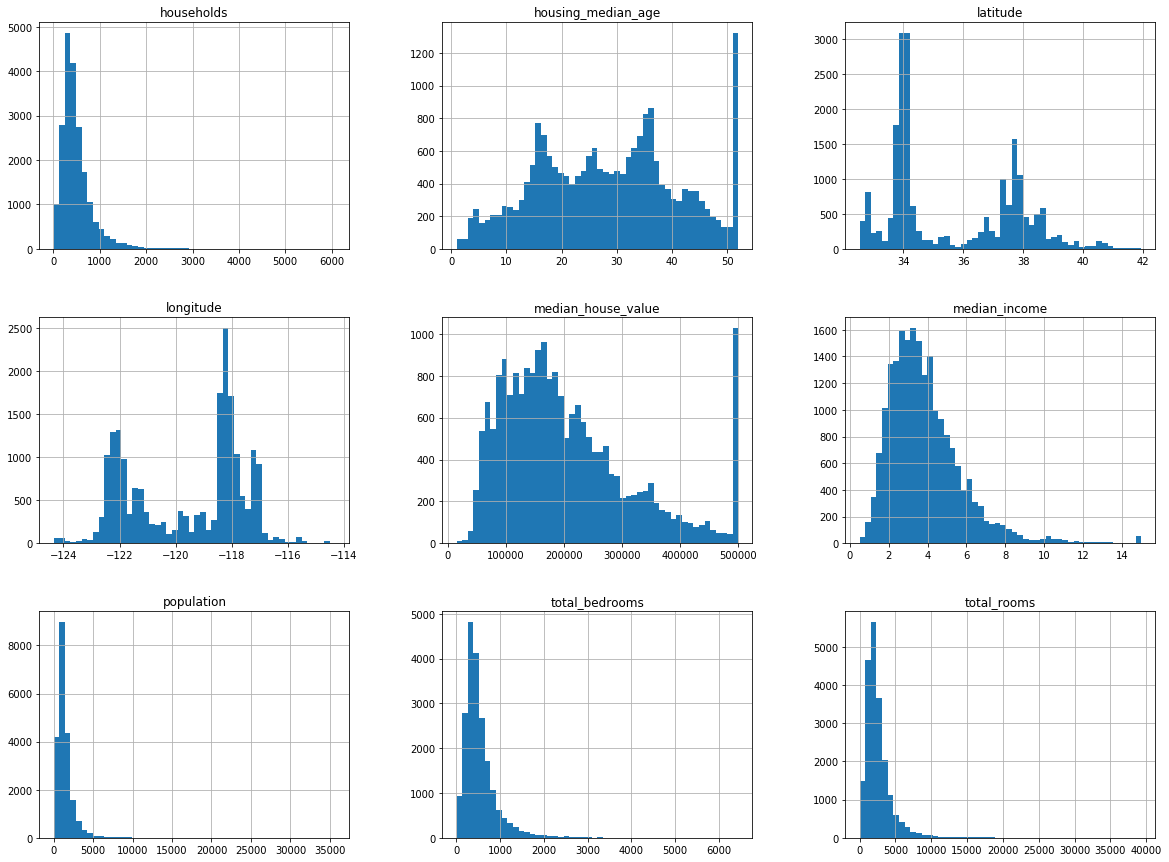

In [13]:
housing.hist(bins= 50, figsize = (20,15))

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_set, test_set = train_test_split(housing , test_size = 0.2, random_state = 42)

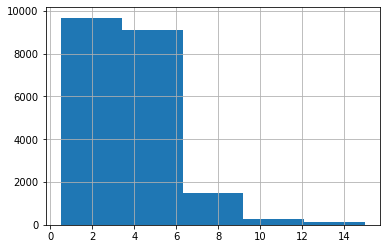

In [18]:
housing['median_income'].hist(bins = 5)

In [21]:
housing['income_cat'] = pd.cut(housing['median_income'], bins = [0.0, 1.5, 3.0, 4.5, 6, np.inf],
                                labels = [1,2,3,4,5])

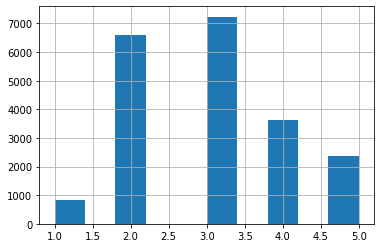

In [22]:
housing['income_cat'].hist()

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

In [24]:
split = StratifiedShuffleSplit(n_splits= 1, test_size= 0.2, random_state= 42)

In [28]:
for train_index, test_index in split.split(housing, housing['income_cat']) :
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [32]:
strat_train_set['income_cat'].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [33]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [34]:
for set_ in (strat_train_set, strat_test_set) :
    set_.drop('income_cat', axis=1, inplace = True)

In [35]:
housing = strat_train_set.copy()

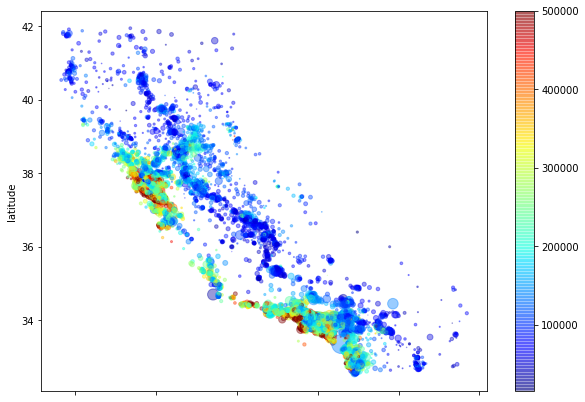

In [44]:
housing.plot(x = 'longitude', y = 'latitude', kind = 'scatter', alpha = 0.4,
            s = housing['population']/100, c = housing['median_house_value'],
             cmap = plt.get_cmap('jet'), figsize  = (10,7) )

In [45]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


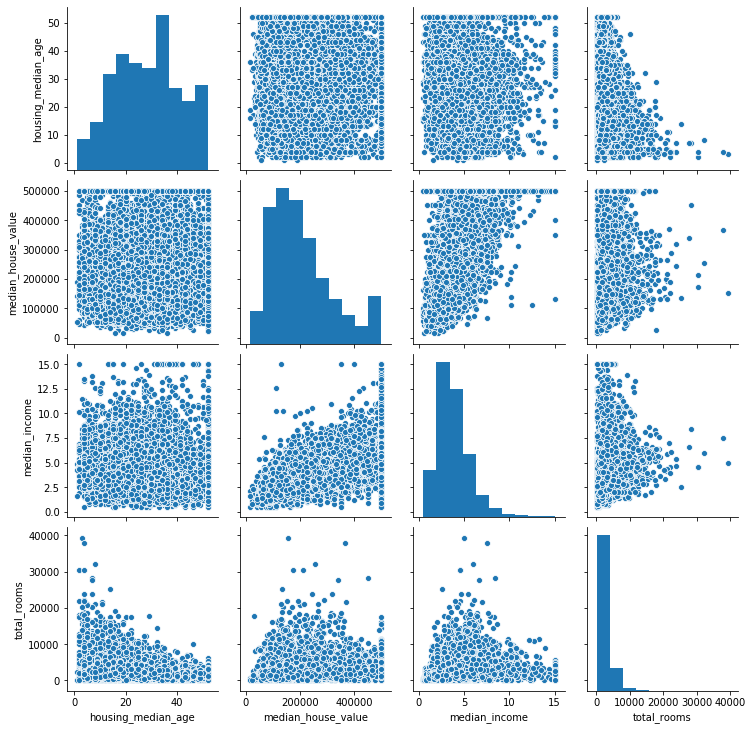

In [46]:
attributes = ['housing_median_age', 'median_house_value', 'median_income', 'total_rooms']

sns.pairplot(housing[attributes])

In [47]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


In [48]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_household'] = housing['total_bedrooms']/housing['households']
housing['population_per_household'] = housing['population']/housing['households']

In [50]:
corr_matrix = housing.corr()

corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
bedrooms_per_household     -0.043343
longitude                  -0.047432
latitude                   -0.142724
Name: median_house_value, dtype: float64

In [51]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [52]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [53]:
from sklearn.impute import SimpleImputer

In [55]:
imputer = SimpleImputer(strategy= "median")

In [56]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [57]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [58]:
X = imputer.transform(housing_num)

In [60]:
housing_num_imputed = pd.DataFrame(data= X, columns= housing_num.columns, index= housing_num.index)

In [63]:
housing_num_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [70]:
housing_cat = housing[['ocean_proximity']]

In [71]:
housing_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [78]:
from sklearn.preprocessing import LabelBinarizer

In [82]:
features = pd.get_dummies(housing_cat, drop_first=True)

In [84]:
housing_cat = pd.concat([housing_cat.drop('ocean_proximity', axis=1), features], axis=1)

In [85]:
housing_cat.head(3)

,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17606,0,0,0,0
18632,0,0,0,0
14650,0,0,0,1


In [87]:
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN


In [95]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_idx, bedrooms_idx, population_idx, households_idx = 3,4,5,6

class CombineAttributeAdder(BaseEstimator, TransformerMixin) :
    
    def __init__(self, add_bedrooms_per_room = True) :
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y = None) :
        return self
    def transform(self, X, y = None) :
        rooms_per_household = X[:,rooms_idx] / X[:, households_idx]
        population_per_household = X[: ,population_idx] / X[:, households_idx]
        if self.add_bedrooms_per_room :
            bedrooms_per_room = X[:, bedrooms_idx] / X[:, rooms_idx]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else :
            return np.c_[X, rooms_per_household, population_per_household]

In [96]:
attributes_adder = CombineAttributeAdder(add_bedrooms_per_room = False)

housing_extra_attribute = attributes_adder.transform(housing.values)

In [98]:
housing_extra_attribute.shape

(16512, 11)

In [99]:
housing.shape

(16512, 9)

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [101]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy= 'median')),
    ('attri_adder', CombineAttributeAdder()),
    ('std_scaler', StandardScaler())
])

In [102]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [104]:
from sklearn.compose import ColumnTransformer

In [107]:
num_attri = list(housing_num)
cat_attri = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attri),
    ("cat", OneHotEncoder(), cat_attri)
])

In [108]:
housing_prepared = full_pipeline.fit_transform(housing)

In [109]:
from sklearn.linear_model import LinearRegression

In [111]:
lin_reg = LinearRegression()

In [112]:
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
from sklearn.metrics import mean_squared_error

In [114]:
housing_predictions = lin_reg.predict(housing_prepared)

In [115]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)

In [116]:
lin_rmse = np.sqrt(lin_mse)

In [117]:
lin_rmse

68628.19819848923

In [118]:
from sklearn.tree import DecisionTreeRegressor

In [119]:
tree = DecisionTreeRegressor()

In [120]:
tree.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [121]:
tree_predictions = tree.predict(housing_prepared)

In [122]:
tree_mse = mean_squared_error(housing_labels, tree_predictions)

In [123]:
tree_rmse = np.sqrt(tree_mse)

In [124]:
tree_rmse

0.0

In [125]:
from sklearn.model_selection import cross_val_score

In [126]:
scores = cross_val_score(tree, housing_prepared, housing_labels, scoring= "neg_mean_squared_error", cv = 10)

In [127]:
tree_rmse_score = np.sqrt(-scores)

In [129]:
def display_scores(scores) :
    print(f'Scores : {scores}')
    print(f'Mean: {scores.mean()}')
    print(f'Std: {scores.std()}')

In [130]:
display_scores(tree_rmse_score)

Scores : [69218.50623295 66535.99795703 70409.30010677 69383.99986474
 70536.17701149 76647.35480966 70295.91263231 71962.67418683
 77983.78330185 70962.68233797]
Mean: 71393.63884415851
Std: 3268.283222484037


In [131]:
from sklearn.ensemble import RandomForestRegressor

In [132]:
random_forest = RandomForestRegressor()

In [133]:
scores = cross_val_score(random_forest, housing_prepared, housing_labels, scoring= "neg_mean_squared_error", cv= 10)

random_forest_rmse = np.sqrt(-scores)

In [134]:
import joblib

In [135]:
from sklearn.model_selection import GridSearchCV

In [137]:
param_grid = [
    {'n_estimators' : [3, 10, 30], 'max_features' : [4,6,8]},
]

In [140]:
grid_search = GridSearchCV(random_forest, param_grid, cv = 5, 
                           scoring = "neg_mean_squared_error", return_train_score= True)

In [141]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [142]:
cvres = grid_search.cv_results_

In [144]:
for mean_score, param in zip(cvres['mean_test_score'], cvres['params']) :
    print(np.sqrt(-mean_score), param)

61406.231577873645 {'max_features': 4, 'n_estimators': 3}
52661.373425499805 {'max_features': 4, 'n_estimators': 10}
50504.51182074567 {'max_features': 4, 'n_estimators': 30}
59310.38080841734 {'max_features': 6, 'n_estimators': 3}
52403.34309372081 {'max_features': 6, 'n_estimators': 10}
50250.00703099667 {'max_features': 6, 'n_estimators': 30}
59017.07444935454 {'max_features': 8, 'n_estimators': 3}
51853.51689441328 {'max_features': 8, 'n_estimators': 10}
50146.72336837525 {'max_features': 8, 'n_estimators': 30}


In [145]:
grid_search.best_estimator_.feature_importances_

array([6.90811862e-02, 6.42367723e-02, 4.32724336e-02, 1.60743403e-02,
       1.46273011e-02, 1.48896496e-02, 1.45162726e-02, 3.54985954e-01,
       5.81228288e-02, 1.12836422e-01, 6.77670793e-02, 1.17439577e-02,
       1.52515153e-01, 8.32648455e-05, 1.80523161e-03, 3.44215349e-03])

In [1]:
from sklearn.svm import SVC

In [2]:
from sklearn.model_selection import cross_val_score

In [3]:
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
GradientBoostingClassifier()

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)